In [1]:
import numpy as np
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# to display full text
pd.set_option('display.max_colwidth', -1)

<ipython-input-2-3b5970faf0be>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [11]:
df = pd.read_csv(r'D:\論文\PHEME9\Data\CSV\prince-toronto.csv', encoding = 'utf-8', header = None)

In [12]:
df.columns = ['src_tweet_id', 'src_user_id', 'src_tweet','src_date','reply_tweet_id','reply_user_id','reply_tweet','reply_date', 'label']

In [13]:
df.head()

,src_tweet_id,src_user_id,src_tweet,src_date,reply_tweet_id,reply_user_id,reply_tweet,reply_date,label
0,529590949136326656,842564341,"As an aside, Toronto is home to @magpietoronto where Prince @3RDEYEGIRL get a lot of their stage clothes...",Tue Nov 04 11:08:16 +0000 2014,5.295916e+17,1.538385e+09,"@PrinceMuseum @magpietoronto @3RDEYEGIRL Lol, hopefully stocking up on the Summer range 2 pop down 2 Australia!!",Tue Nov 04 11:11:03 +0000 2014,0
1,529695075560071168,134586361,Prince loves this city. He fell for the Toronto woman trap. Happens to the best of them.,Tue Nov 04 18:02:01 +0000 2014,5.296965e+17,6.211173e+07,“@ellhah: Prince loves this city. He fell for the Toronto woman trap. Happens to the best of them.”,Tue Nov 04 18:07:49 +0000 2014,0
2,529695075560071168,134586361,Prince loves this city. He fell for the Toronto woman trap. Happens to the best of them.,Tue Nov 04 18:02:01 +0000 2014,5.296980e+17,4.464473e+07,@ellhah Prince x Red Drink Boutique invite only party will be a story for another day...,Tue Nov 04 18:13:30 +0000 2014,0
3,529755373721632768,1395136699,PRINCE gives Toronto purple balls .....,Tue Nov 04 22:01:38 +0000 2014,NaN,NaN,NaN,NaN,0
4,529761572881985536,43451286,Dammit Prince. Toronto needs a win right now.,Tue Nov 04 22:26:16 +0000 2014,NaN,NaN,NaN,NaN,0


In [9]:
df.shape

(768, 9)

In [14]:
df.src_tweet_id = df.src_tweet_id.astype(str)
df.src_user_id = df.src_user_id.astype(str)

df.reply_tweet_id = df.reply_tweet_id.astype(str)
df.reply_tweet_id = df.reply_tweet_id.replace('nan',np.nan)

df.reply_user_id = df.reply_user_id.astype(str)
df.reply_user_id = df.reply_user_id.replace('nan',np.nan)

df.src_date = df.src_date.apply(pd.to_datetime)
df.reply_date = df.reply_date.apply(pd.to_datetime)

In [15]:
df.isnull().sum()

src_tweet_id      0 
src_user_id       0 
src_tweet         0 
src_date          0 
reply_tweet_id    99
reply_user_id     99
reply_tweet       99
reply_date        99
label             0 
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   src_tweet_id    768 non-null    object             
 1   src_user_id     768 non-null    object             
 2   src_tweet       768 non-null    object             
 3   src_date        768 non-null    datetime64[ns, UTC]
 4   reply_tweet_id  669 non-null    object             
 5   reply_user_id   669 non-null    object             
 6   reply_tweet     669 non-null    object             
 7   reply_date      669 non-null    datetime64[ns, UTC]
 8   label           768 non-null    int64              
dtypes: datetime64[ns, UTC](2), int64(1), object(6)
memory usage: 54.1+ KB


In [35]:
print("# of source tweets:",df.src_tweet_id.nunique())
print("# of source users:",df.src_user_id.nunique())
print("# of reply users:",df.reply_user_id.nunique())
print("# of reply tweets:",df.reply_tweet_id.nunique())

# of source tweets: 233
# of source users: 167
# of reply users: 428
# of reply tweets: 669


<AxesSubplot:xlabel='count', ylabel='Count'>

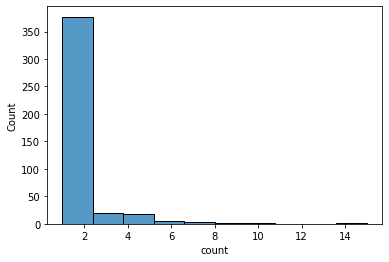

In [40]:
reply_user = df.reply_user_id.value_counts().sort_values(ascending=False).to_frame()
reply_user.rename(columns={'reply_user_id' :'count'},inplace=True)
sns.histplot(data=reply_user ,x='count')



In [59]:
more_freq_reply_user = reply_user.loc[reply_user['count'] == 1].index

In [60]:
more_freq = df[df['reply_user_id'].isin(more_freq_reply_user)]
more_freq.label.value_counts()

1    319
0    3  
Name: label, dtype: int64

In [ ]:
source_user = df.src_user_id.value_counts().sort_values(ascending=False).to_frame()
source_user.rename(columns={'src_user_id' :'count'},inplace=True)
sns.displot(data=source_user ,x='count',kind="kde")
plt.title('...',fontsize = 20)
plt.xlabel('# of reply tweet', fontsize=12)
plt.ylabel('density', fontsize=12)
plt.show()


In [ ]:
df.groupby('src_tweet_id')['label'].value_counts().sort_values('label')#.plot(kind = 'bar')
# plt.title('Rumour tweet are more than non-rumor tweet',fontsize = 14)
# plt.xlabel('Rumor / Non-Rumour', fontsize=12)
# plt.ylabel('Count', fontsize=12)
# plt.show()

In [ ]:
df[df.label ==0]

In [ ]:
df[df.reply_user_id =='nan'].head()